# 3.2b: Credit Card Fraud Detection using Scikit-Learn and Snap ML

## Guided stuff

In [2]:
import opendatasets as od

In [3]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
rawData = pd.read_csv("2b_creditcard.csv")

In [6]:
print(len(rawData))
print(len(rawData.columns))

284807
31


In [7]:
rawData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
replicaCount = 10

inflatedRawData = pd.DataFrame(np.repeat(rawData.values, replicaCount, axis=0), columns=rawData.columns)

In [9]:
print(len(inflatedRawData))
print(len(inflatedRawData.columns))

2848070
31


In [10]:
inflatedRawData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


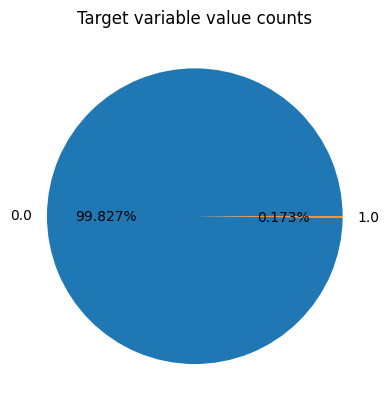

In [11]:
labels = inflatedRawData.Class.unique()
sizes = inflatedRawData.Class.value_counts()

figure, axis = plt.subplots()
axis.pie(sizes, labels=labels, autopct="%1.3f%%")
axis.set_title("Target variable value counts")

plt.show()

## Practice

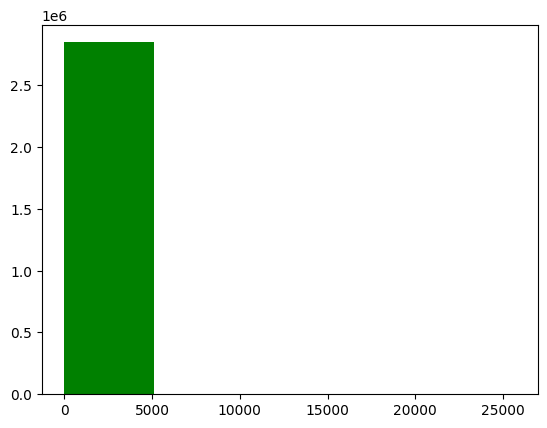

In [18]:
plt.hist(inflatedRawData.Amount.values, 5, histtype="bar", facecolor="g")
plt.show()

In [15]:
print(np.min(inflatedRawData.Amount.values))
print(np.max(inflatedRawData.Amount.values))

0.0
25691.16


In [19]:
print(f"90% less than or equal to {np.percentile(rawData.Amount.values, 90)}")

90% less than or equal to 203.0


## More guided stuff

In [22]:
inflatedRawData.iloc[:, 1:30] = StandardScaler().fit_transform(inflatedRawData.iloc[:, 1:30])
dataMatrix = inflatedRawData.values

featureMatrix = normalize(dataMatrix[:, 1:30], norm="l1")
labelVector = dataMatrix[:, 30]

print(featureMatrix.shape)
print(labelVector.shape)

(2848070, 29)
(2848070,)


In [25]:
trainX, testX, trainY, testY = train_test_split(featureMatrix, labelVector, test_size=0.3, random_state=42, stratify=labelVector)
print(trainX.shape)
print(testX.shape)

(1993649, 29)
(854421, 29)


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
trainWeights = compute_sample_weight("balanced", trainY)
sklearnDecisionTree = DecisionTreeClassifier(max_depth=4, random_state=35)

In [35]:
sklearnDecisionTree.fit(trainX, trainY, sample_weight=trainWeights)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [36]:
from snapml import DecisionTreeClassifier

In [37]:
snapmlDecisionTree = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=12)

In [38]:
snapmlDecisionTree.fit(trainX, trainY, sample_weight=trainWeights)

DecisionTreeClassifier(max_depth=4, n_jobs=12, random_state=45)

In [39]:
sklearnPred = sklearnDecisionTree.predict_proba(testX)[:,1]
snapmlPred = snapmlDecisionTree.predict_proba(testX)[:,1]

sklearnScore = roc_auc_score(testY, sklearnPred)
snapmlScore = roc_auc_score(testY, snapmlPred)

print(f"sklearn: {sklearnScore}")
print(f"snapml: {snapmlScore}")

sklearn: 0.9662628370593128
snapml: 0.9660978435927898


In [40]:
from sklearn.svm import LinearSVC

sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

t0 = time.time()
sklearn_svm.fit(trainX, trainY)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  107.38


In [44]:
from snapml import SupportVectorMachine

snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)

t0 = time.time()
model = snapml_svm.fit(trainX, trainY)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  11.14


In [45]:
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

sklearn_pred = sklearn_svm.decision_function(testX)

acc_sklearn  = roc_auc_score(testY, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

snapml_pred = snapml_svm.decision_function(testX)

acc_snapml  = roc_auc_score(testY, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 9.64x 
[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985


## Practice???

In [46]:
sklearn_pred = sklearn_svm.decision_function(testX)
snapml_pred  = snapml_svm.decision_function(testX)

from sklearn.metrics import hinge_loss

loss_snapml = hinge_loss(testY, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

loss_sklearn = hinge_loss(testY, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))

[Snap ML] Hinge loss:   0.228
[Scikit-Learn] Hinge loss:   0.228
